# アテンションの結果を可視化する

In [116]:
import numpy as np
from dataset import sequence
import matplotlib.pyplot as plt
from common.attention_biseq2seq import AttentionBiSeq2seq
from common.attention_seq2seq import AttentionSeq2seq

## データを読む

In [117]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

print("文字列を文字idに変換するdict")
print(char_to_id)
print("文字idを文字列に変換するdict")
print(id_to_char)

文字列を文字idに変換するdict
{'s': 0, 'e': 1, 'p': 2, 't': 3, 'm': 4, 'b': 5, 'r': 6, ' ': 7, '2': 8, '7': 9, ',': 10, '1': 11, '9': 12, '4': 13, '_': 14, '-': 15, '0': 16, 'A': 17, 'u': 18, 'g': 19, '3': 20, '8': 21, '/': 22, 'T': 23, 'U': 24, 'E': 25, 'S': 26, 'D': 27, 'Y': 28, 'P': 29, 'M': 30, 'B': 31, 'R': 32, '5': 33, 'J': 34, 'N': 35, '6': 36, 'a': 37, 'i': 38, 'l': 39, 'O': 40, 'c': 41, 'o': 42, 'G': 43, 'F': 44, 'y': 45, 'n': 46, 'C': 47, 'W': 48, 'd': 49, 'I': 50, 'L': 51, 'j': 52, 'H': 53, 'v': 54, 'h': 55, 'V': 56, 'f': 57, 'w': 58}
文字idを文字列に変換するdict
{0: 's', 1: 'e', 2: 'p', 3: 't', 4: 'm', 5: 'b', 6: 'r', 7: ' ', 8: '2', 9: '7', 10: ',', 11: '1', 12: '9', 13: '4', 14: '_', 15: '-', 16: '0', 17: 'A', 18: 'u', 19: 'g', 20: '3', 21: '8', 22: '/', 23: 'T', 24: 'U', 25: 'E', 26: 'S', 27: 'D', 28: 'Y', 29: 'P', 30: 'M', 31: 'B', 32: 'R', 33: '5', 34: 'J', 35: 'N', 36: '6', 37: 'a', 38: 'i', 39: 'l', 40: 'O', 41: 'c', 42: 'o', 43: 'G', 44: 'F', 45: 'y', 46: 'n', 47: 'C', 48: 'W', 49: 'd', 5

## 学習済みモデルを読み込む

In [118]:
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
model.load_params(file_name="AttentionSeq2seq.pkl")

# model = AttentionBiSeq2seq(vocab_size, wordvec_size, hidden_size)
# model.load_params(file_name="dataset/AttentionBiSeq2seq_pre.pkl")
# model.load_params(file_name="AttentionBiSeq2seq.pkl")

# _idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)
    ax.set_xlabel("input data")
    ax.set_ylabel("output data")    
    plt.show()

## アテンション結果を表示させる
グラフは、ある単語を予測する際に、どの入力単語に注目しているかを示している  
色が白いほど、注目度が高いということになる

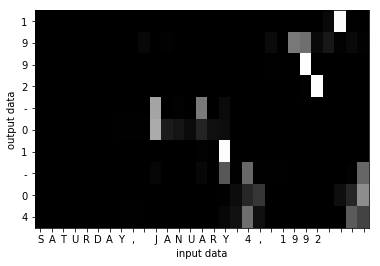

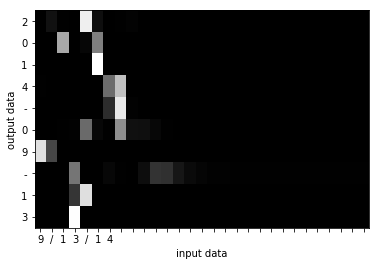

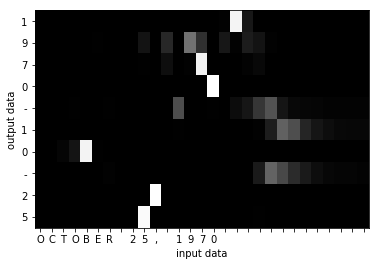

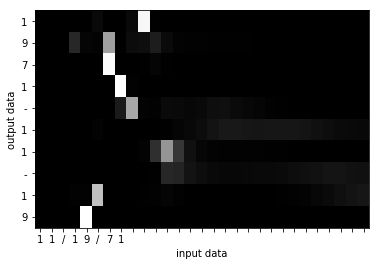

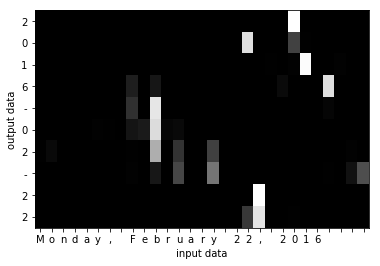

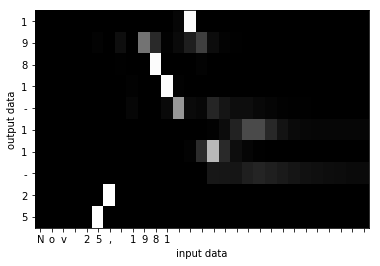

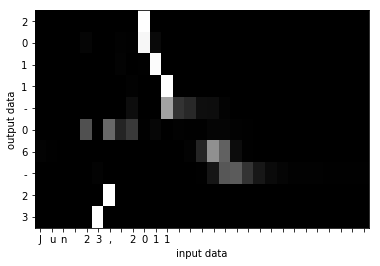

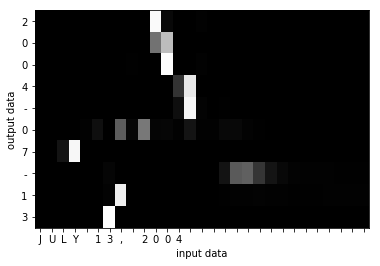

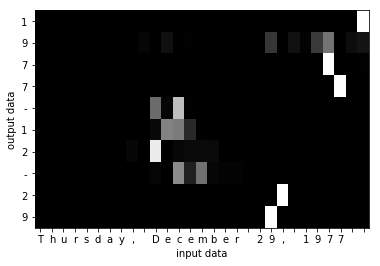

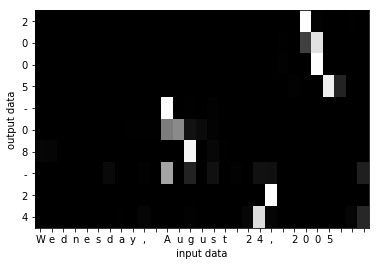

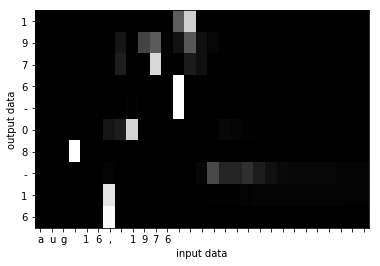

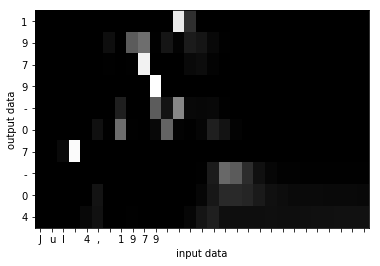

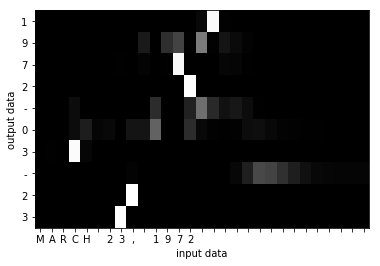

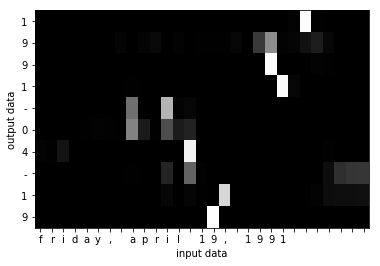

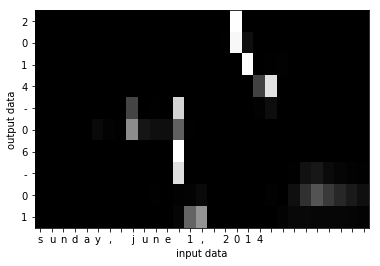

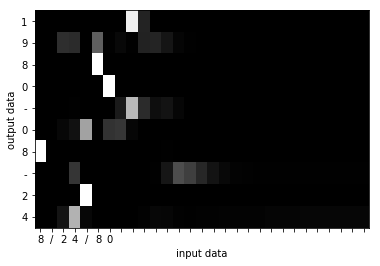

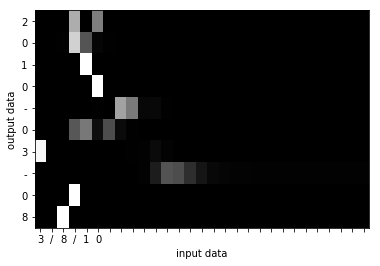

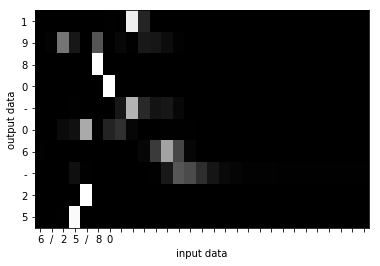

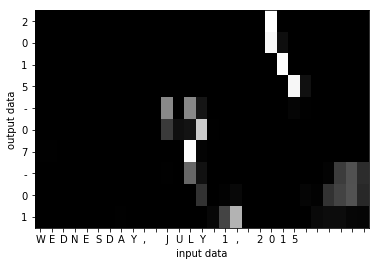

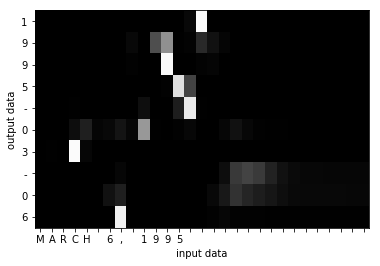

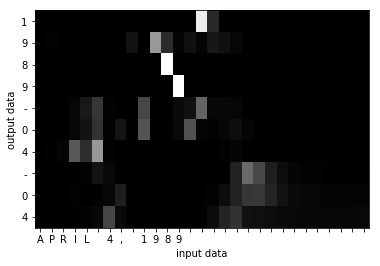

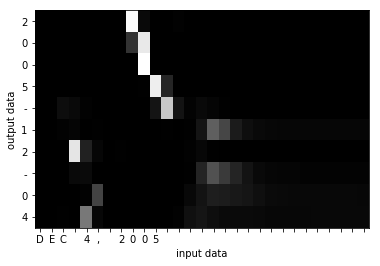

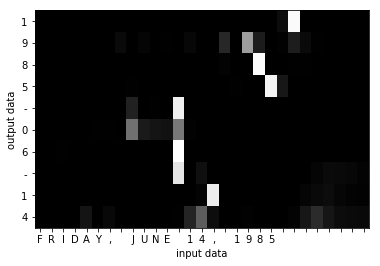

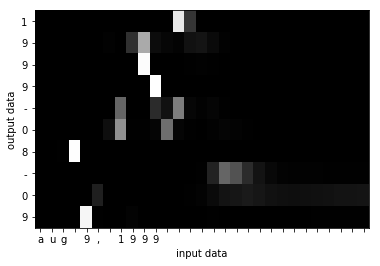

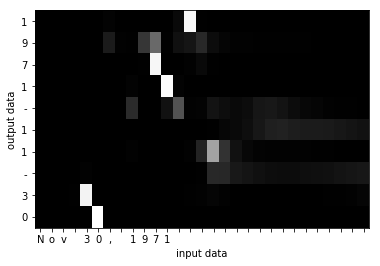

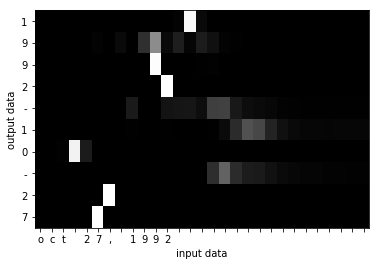

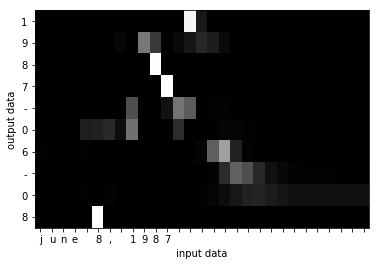

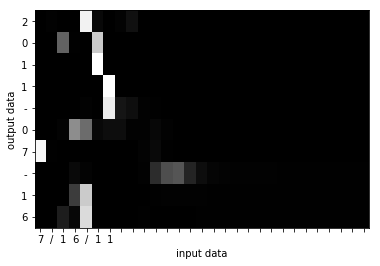

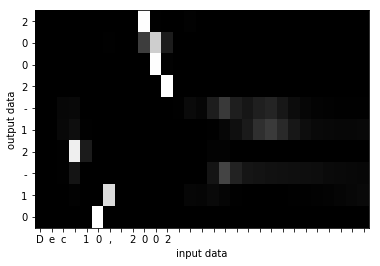

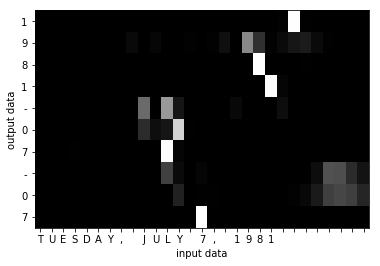

In [119]:
np.random.seed(12345)
for _ in range(30):
    idx = [np.random.randint(0, len(x_test))]
    x = x_test[idx]
    t = t_test[idx]

    model.forward(x, t) # 教師強制で順伝播を行う
    d = model.decoder.attention.attention_weights
    d = np.array(d)
    attention_map = d.reshape(d.shape[0], d.shape[2])

    row_labels = [id_to_char[i] for i in x[0]]
    column_labels = [id_to_char[i] for i in t[0]]
    column_labels = column_labels[1:]

    visualize(attention_map, row_labels, column_labels)